In [2]:
import pandas as pd
df=pd.read_csv("car_prices_dataset.csv")
print(df.shape)
df.head()

(10000, 5)


,Engine_Size,Mileage,Doors,Owner_Count,Price
0,4.2,289944,3,5,8501
1,2.0,5356,2,3,12092
2,4.2,231440,4,2,11171
3,2.0,160971,2,1,11780
4,2.6,286618,3,3,2867


In [3]:
x=df.drop(['Price'], axis=1)
x[:5]

,Engine_Size,Mileage,Doors,Owner_Count
0,4.2,289944,3,5
1,2.0,5356,2,3
2,4.2,231440,4,2
3,2.0,160971,2,1
4,2.6,286618,3,3


In [4]:
# Target

y=df.Price
y[:5]

0     8501
1    12092
2    11171
3    11780
4     2867
Name: Price, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, max_leaf_nodes=10, random_state=42)
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

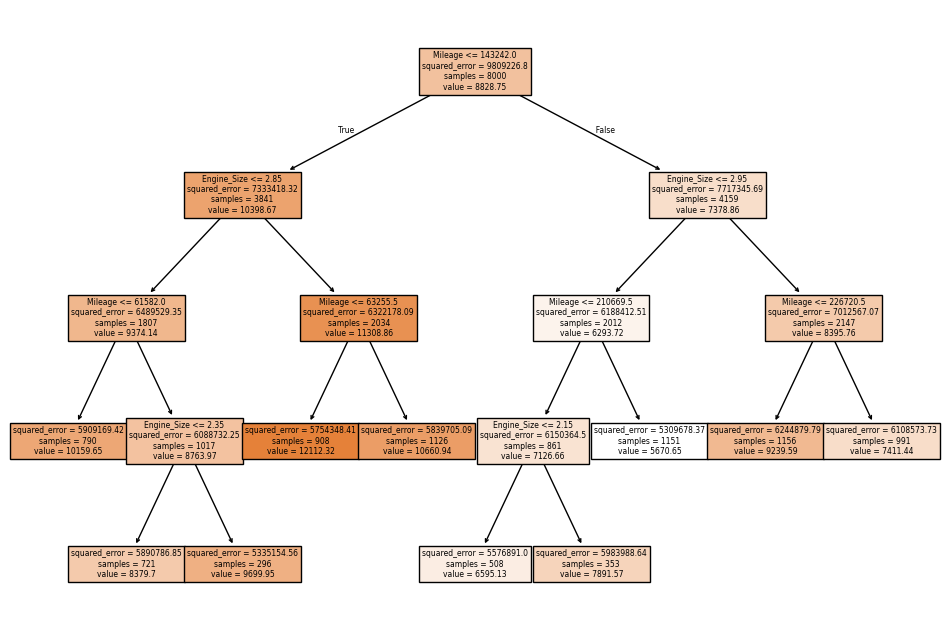

In [6]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, 
          filled=True, 
          feature_names=x.columns, 
          precision=2)
plt.show()

In [7]:
x.columns.values

array(['Engine_Size', 'Mileage', 'Doors', 'Owner_Count'], dtype=object)

In [8]:
input_data = pd.DataFrame([[2.0, 75000, 4, 5]], columns=x.columns.values)

predicted_price = model.predict(input_data)[0]

print(f"Predicted Price: ${predicted_price:,.2f}")

Predicted Price: $8,379.70
